Accuracy score: 1.00


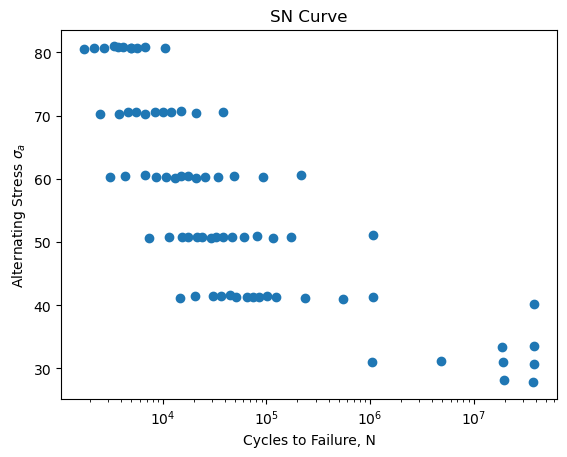

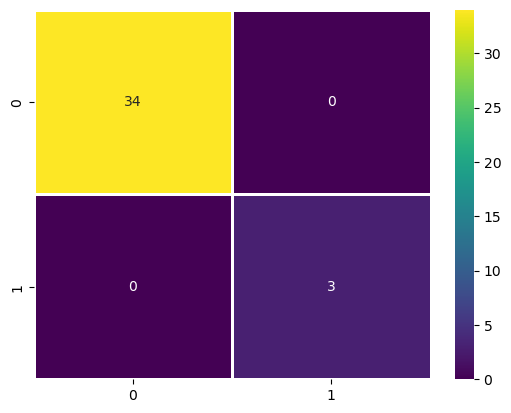

In [45]:
import pandas as pd  # type: ignore
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb # type: ignore


df = pd.read_csv(r"C:\Users\Patrick\Documents\Machine Learning\In Class 3.csv")
df.columns = ['x','y']

plt.figure()
plt.scatter(df['x'],df['y'])
plt.xlabel("Cycles to Failure, N")
plt.ylabel("Alternating Stress $\sigma_a$")
plt.title("SN Curve")
plt.xscale('log')

target = np.zeros(df['x'].size)
target[target.size-7:] = 1
df['target'] = target

X = df[['x','y']].to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, stratify=y, random_state=42)
X_train.shape,y_train.shape


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
print("Accuracy score: %0.2f" % (knn_model.score(X_test,y_test)))

pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test,pred)
plt.figure()
ax = sb.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True)





